In [1]:
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

## Load Depression Data for CFL 

`data_w0_12.csv` or `data_w0_36.csv` are edited versions of the IMPACT study data set used by Madison Aitken in her recent paper. 
This notebook loads a .csv file (either `data_w0_12.csv` or `data_w0_36.csv` ) and extracts the data needed to create the following X and Y datasets: 

- Cause (X): subject results up to column CN at week 0
- Effect (Y): hoNOSCA value at week 12/36 

These datasets are then saved as .npy files 

Our CFL question: if we look at the diagnostic tests at week 0, and then the improvements at week 12 or 36, can we locate what indicators in the data at week 0 led to less vs more improvement at week 12/36 ?

#### User: Make sure you have the correct data file in the same folder as this notebook. Then uncomment the correct version of `which_data_to_load` variable, then run the whole notebook

In [2]:
# which_data_to_load = '12'  # change which value is uncommented to load a different data 
which_data_to_load = '36'

In [3]:
path_to_folder = os.path.join('IMPACT_CausalFeatureLearning', 'Data')

In [4]:
if which_data_to_load == '12': 
    # frederick has already cleaned up the data for these two data sets 
    full_data = pd.read_csv(os.path.join(path_to_folder, 'data_w0_12.csv'), engine='python')
elif which_data_to_load == '36': 
    full_data = pd.read_csv(os.path.join(path_to_folder, 'data_w0_36.csv'), engine='python')

print(full_data)

       id  arm  sessions    age  sex  region  site  Time  mf1c  mf2c  ...  \
0    1106    0        12  15.72    1       1     1     0     1     1  ...   
1    1106    0        12  15.72    1       1     1    36     1     1  ...   
2    1107    2        19  14.43    1       1     1     0     2     1  ...   
3    1107    2        19  14.43    1       1     1    36     1     0  ...   
4    1110    0         4  16.72    0       1     1     0     2     1  ...   
..    ...  ...       ...    ...  ...     ...   ...   ...   ...   ...  ...   
335  3458    0         7  15.56    0       3    13    36     1     1  ...   
336  3459    1         7  17.90    1       3    13     0     2     1  ...   
337  3459    1         7  17.90    1       3    13    36     1     1  ...   
338  3461    2         6  16.10    1       3    13     0     1     1  ...   
339  3461    2         6  16.10    1       3    13    36     1     1  ...   

     bc3c  bc4c  bc5c  bc6c  bc7c  bc8c  bc9c  bc10c  bc11c   HoNOSCA  
0  

#### Create the X Dataset 

In [5]:
# for X data: only use data from time 0 
X_df = full_data[full_data.Time==0]
# grab columns I through CM (all the questionnaire results)
X_df = X_df.iloc[:, 8:-1]

print(X_df[:5])

   mf1c  mf2c  mf3c  mf4c  mf5c  mf6c  mf7c  mf8c  mf9c  mf10c  ...  bc2c  \
0     1     1     2     0     1     1     1     1     2      1  ...     0   
2     2     1     1     1     2     0     2     1     2      0  ...     0   
4     2     1     2     0     2     1     2     2     2      2  ...     1   
6     2     2     1     1     2     2     1     2     2      2  ...     0   
8     2     2     1     1     1     1     0     2     1      2  ...     0   

   bc3c  bc4c  bc5c  bc6c  bc7c  bc8c  bc9c  bc10c  bc11c  
0     1     1     0     1     0     0     0      0      0  
2     0     0     0     1     0     0     0      0      0  
4     0     0     2     1     0     0     0      0      0  
6     0     0     0     0     0     0     0      0      0  
8     0     0     0     1     0     0     0      0      0  

[5 rows x 83 columns]


#### Create the Y dataset

In [6]:
# for Y: only take the data from the later session (time = 12 or 36)
Y_df = full_data[full_data.Time!=0]

#  grab the HoNOSCA column
Y_df = Y_df.loc[:, 'HoNOSCA']
print(Y_df[:5])

1    0.153846
3    0.076923
5    0.454545
7    1.000000
9    1.153846
Name: HoNOSCA, dtype: float64


#### Convert both datasets to numpy arrays 

In [7]:
# convert X and Y from Pandas dfs to numpy arrays 
X = X_df.to_numpy()
Y = Y_df.to_numpy()

In [8]:
X.shape # X has dimensions (n_subjects, n_question_responses)

(170, 83)

In [9]:
Y.shape # Y has dimensions (n_subjects, )

Y = np.expand_dims(Y, -1) # now Y has dimensions (n_subjects, n_features)
print(Y.shape)

(170, 1)


In [10]:
print("There are \n{} subjects in the X dataset and \n{} subjects in the Y dataset".format(X.shape[0], Y.shape[0]))

There are 
170 subjects in the X dataset and 
170 subjects in the Y dataset


In [11]:
print("The dimensions of X are {}\nThe dimensions of Y are {}".format(X.shape, Y.shape))

The dimensions of X are (170, 83)
The dimensions of Y are (170, 1)


#### Save the X and Y data sets as numpy arrays 

In [12]:
np.save('X_questionnaire_hoNOSCA_' +which_data_to_load, X)
np.save('Y_questionnaire_hoNOSCA_' +which_data_to_load, Y)

## Visualizing the Questionnaire data at Week 0 

In [13]:
## uncomment this code to install the plot_likert package 
# import sys 
# !{sys.executable} -m pip install plot-likert 
# thanks to https://github.com/nmalkin/plot-likert for the plot_likert package

import plot_likert

In [14]:
X_df.iloc[:, :33].columns

Index(['mf1c', 'mf2c', 'mf3c', 'mf4c', 'mf5c', 'mf6c', 'mf7c', 'mf8c', 'mf9c',
       'mf10c', 'mf11c', 'mf12c', 'mf13c', 'mf14c', 'mf15c', 'mf16c', 'mf17c',
       'mf18c', 'mf19c', 'mf20c', 'mf21c', 'mf22c', 'mf23c', 'mf24c', 'mf25c',
       'mf26c', 'mf27c', 'mf28c', 'mf29c', 'mf30c', 'mf31c', 'mf32c', 'mf33c'],
      dtype='object')

In [15]:
X_df.iloc[:, 33:61].columns

Index(['rc1c', 'rc2c', 'rc3c', 'rc4c', 'rc5c', 'rc6c', 'rc7c', 'rc8c', 'rc9c',
       'rc10c', 'rc11c', 'rc12c', 'rc13c', 'rc14c', 'rc15c', 'rc16c', 'rc17c',
       'rc18c', 'rc19c', 'rc20c', 'rc21c', 'rc22c', 'rc23c', 'rc24c', 'rc25c',
       'rc26c', 'rc27c', 'rc28c'],
      dtype='object')

In [16]:
X_df.iloc[:, 61:].columns

Index(['lo1c', 'lo2c', 'lo3c', 'lo4c', 'lo5c', 'lo6c', 'lo7c', 'lo8c', 'lo9c',
       'lo10c', 'lo11c', 'bc1c', 'bc2c', 'bc3c', 'bc4c', 'bc5c', 'bc6c',
       'bc7c', 'bc8c', 'bc9c', 'bc10c', 'bc11c'],
      dtype='object')

Text(0.5, 1.0, 'Aggregate Responses at Week 0 for MF questionnaire')

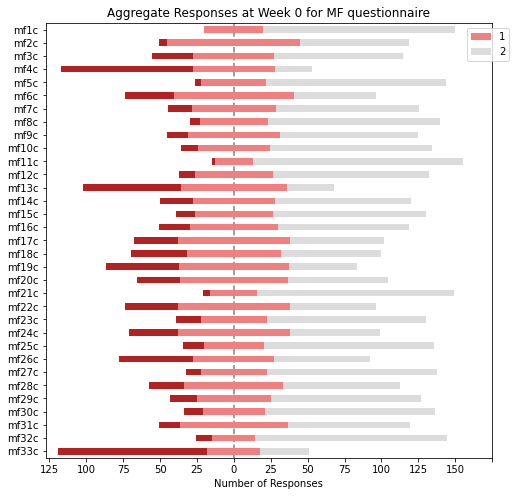

In [17]:
ax = plot_likert.plot_likert(X_df.iloc[:, :33], [0, 1, 2], figsize=(8, 8))
ax.set_title("Aggregate Responses at Week 0 for MF questionnaire")

Text(0.5, 1.0, 'Aggregate Responses at Week 0 for RC questionnaire')

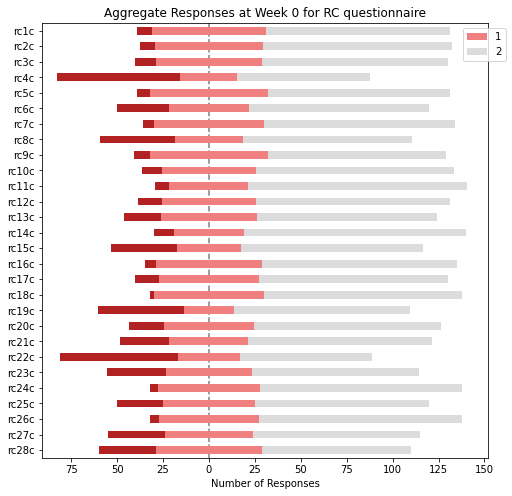

In [18]:
ax = plot_likert.plot_likert(X_df.iloc[:, 33:61], [0, 1, 2], figsize=(8,8))
ax.set_title("Aggregate Responses at Week 0 for RC questionnaire")

Text(0.5, 1.0, 'Aggregate Responses at Week 0 for LO and BC questionnaires')

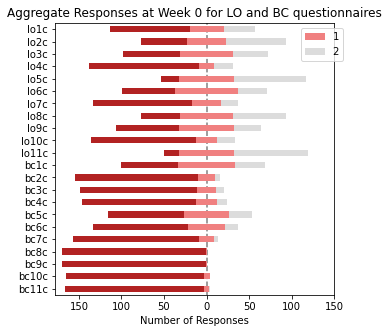

In [19]:
ax = plot_likert.plot_likert(X_df.iloc[:, 61:], [0, 1, 2], figsize=(5, 5))
ax.set_title("Aggregate Responses at Week 0 for LO and BC questionnaires")

## Visualizing the HoNOSCA Week 12/36 results 

Text(0.5, 1.0, 'HoNOSCA results for all participants at week 36')

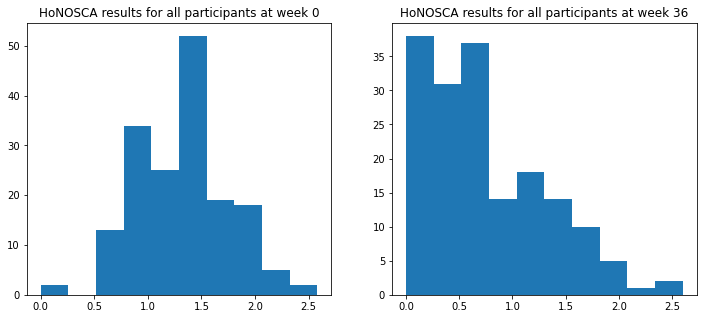

In [20]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
axes[0].hist(full_data.loc[full_data.Time==0, "HoNOSCA"])
axes[0].set_title("HoNOSCA results for all participants at week 0")
axes[1].hist(Y)
axes[1].set_title("HoNOSCA results for all participants at week {}".format(which_data_to_load))

## Visualize Questionnaire Results from Week 0 to Week 12/36

<ipython-input-21-d03633eb719e>:27: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


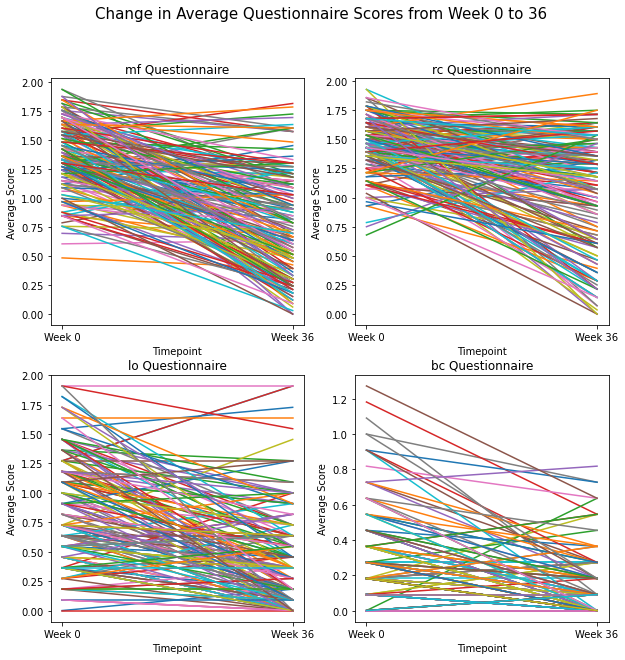

In [21]:
# for each test type:  (mf, rc, lo, bc)
    # graph them in a scatter plot

timepoints = ['Week 0', 'Week '+which_data_to_load]
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for test_type, ax in zip(['mf', 'rc', 'lo', 'bc'], axes.flat): 

    # get only the columns that contain the current test type 
    test_columns = [col for col in full_data.columns if test_type in col]

    for i in np.unique(full_data.id): # iterate over each subject

        # get the results from that questionnare at week 0 and week 12/36
        initial_results = full_data.loc[(full_data.id==i) & (full_data.Time==0), test_columns]
        final_results = full_data.loc[(full_data.id==i) & (full_data.Time==int(which_data_to_load)), test_columns]

        #average the results across all questions for each timepoint 
        both_results = (initial_results.mean(axis=1), final_results.mean(axis=1))
        
        ax.plot(timepoints, both_results, label=str(full_data.id))
        
        ax.set_title("{} Questionnaire".format(test_type))
        ax.set_ylabel("Average Score")
        ax.set_xlabel("Timepoint")
fig.suptitle("Change in Average Questionnaire Scores from Week 0 to {}".format(which_data_to_load), fontsize=15)
fig.show()


^ This graph is not too nice to look at. Look at visualization method 2 instead

#### Visualization Method 2

In [22]:
# create a new df with the same columns as the original data set 
temp_df = full_data.iloc[0:0].copy(deep=True)

#drop all the columns we don't need
temp_df = temp_df.drop(['arm', 'sessions', 'age', 'sex', 'region', 'site', 'Time'], axis = 1)  

quest_columns = temp_df.columns[1:] #all the columns corresponding to questionnaire/HoNOSCA results

# fill the df in with the difference at each ID between (week 0 and week-later)
for i in np.unique(full_data.id): # iterate over each subject
    week0 = full_data.loc[(full_data.id==i) & (full_data.Time==0), quest_columns]
    weekLater = full_data.loc[(full_data.id==i) & (full_data.Time==int(which_data_to_load)), quest_columns]

    x = weekLater.values - week0.values
    series = pd.Series(np.hstack((i, x[0])), temp_df.columns)
    temp_df = temp_df.append(series, ignore_index=True)

In [23]:
temp_df

,id,mf1c,mf2c,mf3c,mf4c,mf5c,mf6c,mf7c,mf8c,mf9c,...,bc3c,bc4c,bc5c,bc6c,bc7c,bc8c,bc9c,bc10c,bc11c,HoNOSCA
0,1106.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,...,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.076923
1,1107.0,-1.0,-1.0,1.0,-1.0,-2.0,0.0,-2.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.923077
2,1110.0,-1.0,1.0,-1.0,1.0,-1.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.090909
3,1111.0,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.230769
4,1113.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.070513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,3449.0,-1.0,-1.0,-1.0,1.0,-1.0,-2.0,-1.0,-2.0,-2.0,...,0.0,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.275641
166,3450.0,-1.0,-2.0,-1.0,0.0,-1.0,-1.0,1.0,-2.0,-1.0,...,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.384615
167,3458.0,-1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-2.0,-1.0,...,-2.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,-1.559441
168,3459.0,-1.0,0.0,0.0,-2.0,0.0,0.0,-1.0,-1.0,0.0,...,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.384615


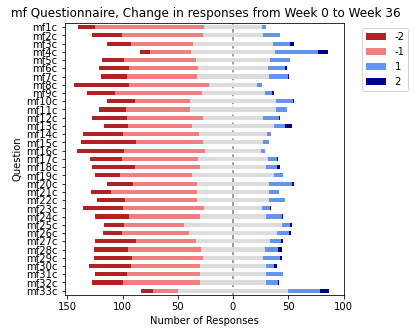

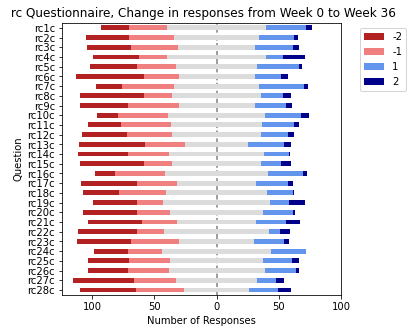

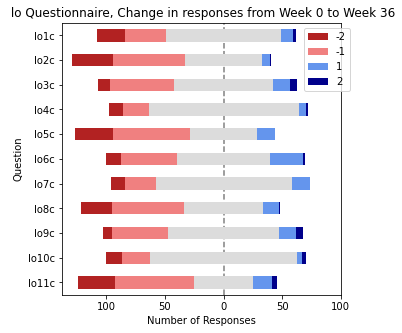

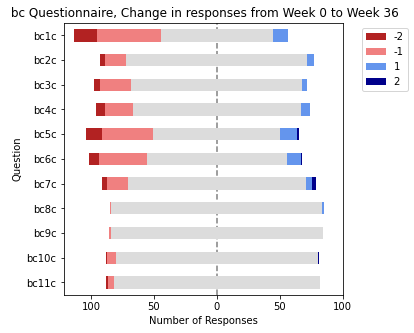

In [24]:
# for each test type:  (mf, rc, lo, bc)
    # graph the change for each question from week 0 to 12/36 

timepoints = ['Week 0', 'Week '+which_data_to_load]

for test_type in ['mf', 'rc', 'lo', 'bc']: 

    # get only the columns that contain the current test type 
    test_columns = [col for col in temp_df.columns if test_type in col]

    # then make a likert scale for each test type 
    ax = plot_likert.plot_likert(temp_df.loc[:, test_columns], [-2, -1, 0, 1, 2], figsize=(5, 5))
        
    ax.set_title(" {} Questionnaire, Change in responses from Week 0 to Week {}".format(test_type, which_data_to_load))
    ax.set_ylabel("Question")


## Visualize HoNOSCA Results from Week 0 to Week 12 

<ipython-input-25-7c9e45f15038>:12: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


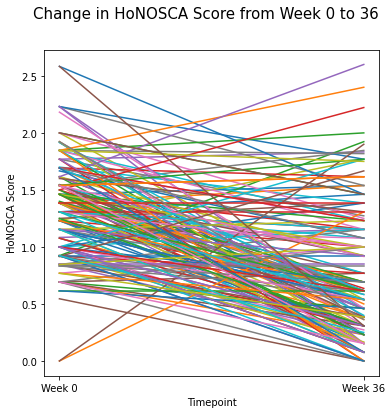

In [25]:
timepoints = ['Week 0', 'Week '+which_data_to_load]

fig, ax = plt.subplots(1, 1, figsize=(6,6 ))
for i in np.unique(full_data.id): # iterate over each subject 
    #plot change in HoNOSCA values from Week 0 to 12/36
    hoNOSCA_results=full_data.loc[(full_data.id==i), "HoNOSCA"]
    ax.plot(timepoints, hoNOSCA_results, label=str(full_data.id))

ax.set_ylabel("HoNOSCA Score")
ax.set_xlabel("Timepoint")
fig.suptitle("Change in HoNOSCA Score from Week 0 to {}".format(which_data_to_load), fontsize=15)
fig.show()


### Questionable Data Entries

In [26]:
# participants with HoNOSCA scores of 0 at Week 0: 
# 3119 and 3139
print(full_data.loc[(full_data.id==3119) & (full_data.Time == 0)])
print(full_data.loc[(full_data.id==3139) & (full_data.Time == 0)])

# ^ may want to exclude these values
# # parent HoNOSCA is non-zero

       id  arm  sessions    age  sex  region  site  Time  mf1c  mf2c  ...  \
242  3119    0        23  15.34    0       3     9     0     2     2  ...   

     bc3c  bc4c  bc5c  bc6c  bc7c  bc8c  bc9c  bc10c  bc11c  HoNOSCA  
242     1     1     1     1     1     0     0      0      0      0.0  

[1 rows x 92 columns]
       id  arm  sessions    age  sex  region  site  Time  mf1c  mf2c  ...  \
250  3139    2        22  15.83    0       3     9     0     1     1  ...   

     bc3c  bc4c  bc5c  bc6c  bc7c  bc8c  bc9c  bc10c  bc11c  HoNOSCA  
250     2     2     1     2     1     1     0      1      0      0.0  

[1 rows x 92 columns]


In [27]:
# using parent vs child HoNOSCA? 
# child is better predictor of recovery 

# what about the children who have HoNOSCA 0 at week 36? Could just be improvement 